In [249]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [250]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [251]:
from sklearn.model_selection import train_test_split

In [252]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [253]:
from sklearn.metrics import r2_score, mean_squared_error

In [254]:
import math as m

In [255]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [256]:
df_train.shape

(550068, 12)

In [257]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [258]:
df_train.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [87]:
100*df_train.isna().sum()/df_train.shape[0]

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [261]:
s = set(df_train.User_ID)
df_train.shape[0] - len(s)

544177

In [88]:
100*df_test.isna().sum()/df_test.shape[0]

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64

In [89]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [90]:
df_train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [91]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [92]:
m = {'M':1, 'F':0}
df_train['Gender'] = df_train['Gender'].map({'M':1, 'F':0})

In [93]:
df_train['Age'] = df_train['Age'].map({'0-17':10, '55+':55, '26-35':30, '46-50':48, '51-55':53, '36-45':40, '18-25':22})

In [94]:
df_train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [95]:
df_train.drop(columns = ['Product_Category_3', 'User_ID'], inplace = True)

In [96]:
df_train['Age'].unique()

array([10, 55, 30, 48, 53, 40, 22])

In [97]:
df_train['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [98]:
df_train.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [99]:
df_train.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [100]:
df_train.drop('Product_Category_2', axis = 1, inplace = True)

In [101]:
df_test.drop(columns = ['Product_Category_2', 'Product_Category_3'], inplace = True)

In [102]:
df_test['Age'] = df_test['Age'].map({'0-17':10, '55+':55, '26-35':30, '46-50':48, '51-55':53, '36-45':40, '18-25':22})

In [103]:
m = {'M':1, 'F':0}
df_test['Gender'] = df_test['Gender'].map({'M':1, 'F':0})

In [104]:
df_train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,P00069042,0,10,10,A,2,0,3,8370
1,P00248942,0,10,10,A,2,0,1,15200
2,P00087842,0,10,10,A,2,0,12,1422
3,P00085442,0,10,10,A,2,0,12,1057
4,P00285442,1,55,16,C,4+,0,8,7969


In [105]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1
0,1000004,P00128942,1,48,7,B,2,1,1
1,1000009,P00113442,1,30,17,C,0,0,3
2,1000010,P00288442,0,40,1,B,4+,1,5
3,1000010,P00145342,0,40,1,B,4+,1,4
4,1000011,P00053842,0,30,1,C,1,0,4


In [106]:
df_train.drop('Product_ID', axis = 1, inplace = True)

In [108]:
df_test.drop(['Product_ID', 'User_ID'], axis = 1, inplace = True)

In [115]:
df_train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [116]:
df_train['Stay_In_Current_City_Years'].replace('4+', 4, inplace = True)

In [117]:
df_test['Stay_In_Current_City_Years'].replace('4+', 4, inplace = True)

In [121]:
df_train.describe()

,Gender,Age,Occupation,Marital_Status,Product_Category_1,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.753105,34.084133,8.076707,0.409653,5.404270,9263.968713
std,0.431205,10.689980,6.522660,0.491770,3.936211,5023.065394
min,0.000000,10.000000,0.000000,0.000000,1.000000,12.000000
25%,1.000000,30.000000,2.000000,0.000000,1.000000,5823.000000
50%,1.000000,30.000000,7.000000,0.000000,5.000000,8047.000000
75%,1.000000,40.000000,14.000000,1.000000,8.000000,12054.000000
max,1.000000,55.000000,20.000000,1.000000,20.000000,23961.000000


### EDA

In [118]:
df_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,0,10,10,A,2,0,3,8370
1,0,10,10,A,2,0,1,15200
2,0,10,10,A,2,0,12,1422
3,0,10,10,A,2,0,12,1057
4,1,55,16,C,4,0,8,7969


In [157]:
df_train['Stay_In_Current_City_Years'] = df_train['Stay_In_Current_City_Years'].astype(int)

In [196]:
df = df_train.groupby(['City_Category'])['Stay_In_Current_City_Years'].sum().to_frame()

In [197]:
df.reset_index(inplace = True)

In [198]:
df

,City_Category,Stay_In_Current_City_Years
0,A,267221
1,B,433470
2,C,321565


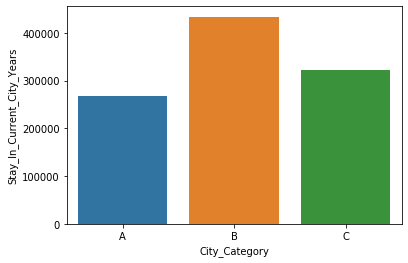

In [199]:
sns.barplot(df['City_Category'], df['Stay_In_Current_City_Years'])
plt.show()

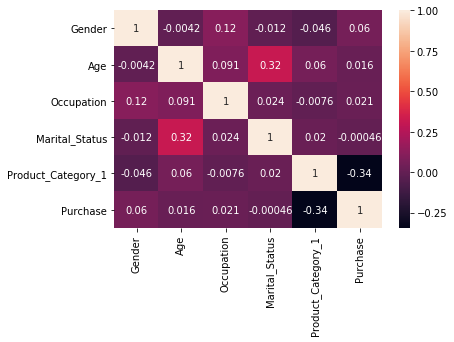

In [120]:
sns.heatmap(df_train.corr(), annot = True)
plt.show()

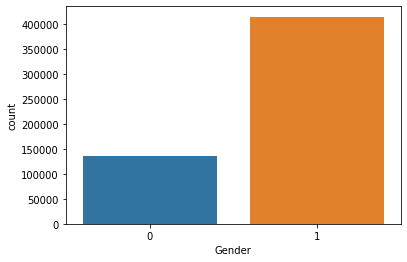

In [122]:
sns.countplot(df_train['Gender'])
plt.show()

In [124]:
df_train['Gender'].value_counts()

1    414259
0    135809
Name: Gender, dtype: int64

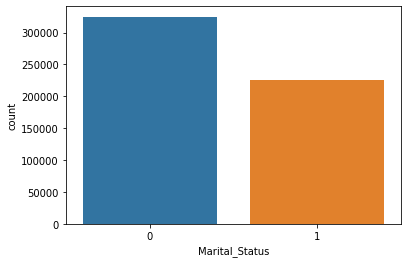

In [128]:
sns.countplot(df_train['Marital_Status'])
plt.show()

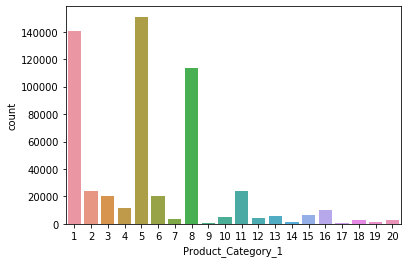

In [129]:
sns.countplot(df_train['Product_Category_1'])
plt.show()

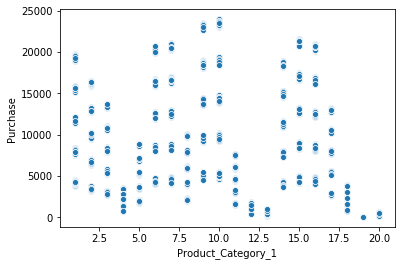

In [136]:
sns.scatterplot(df_train['Product_Category_1'], df_train['Purchase'])
plt.show()

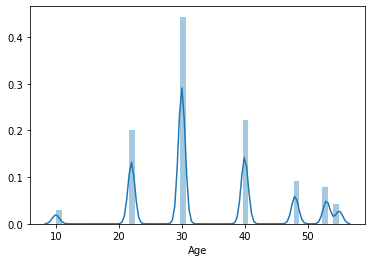

In [200]:
sns.distplot(df_train['Age'])
plt.show()

In [112]:
df_city_train = pd.get_dummies(df_train['City_Category'], prefix = 'city_' )

In [201]:
df_city_train.head()

,city__A,city__B,city__C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1


In [113]:
df_city_test = pd.get_dummies(df_test['City_Category'], prefix = 'city_' )

In [220]:
df_train_merged = pd.concat([df_train, df_city_train], join = 'outer', sort = False, axis = 1)

In [221]:
df_train_merged.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,city__A,city__B,city__C
0,0,10,10,A,2,0,3,8370,1,0,0
1,0,10,10,A,2,0,1,15200,1,0,0
2,0,10,10,A,2,0,12,1422,1,0,0
3,0,10,10,A,2,0,12,1057,1,0,0
4,1,55,16,C,4,0,8,7969,0,0,1


In [222]:
df_test_merged = pd.concat([df_test, df_city_test], join = 'outer', sort = False, axis = 1)

In [223]:
df_test_merged.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,city__A,city__B,city__C
0,1,48,7,B,2,1,1,0,1,0
1,1,30,17,C,0,0,3,0,0,1
2,0,40,1,B,4,1,5,0,1,0
3,0,40,1,B,4,1,4,0,1,0
4,0,30,1,C,1,0,4,0,0,1


In [224]:
df_train_merged.drop(['City_Category', 'city__C'], axis = 1, inplace = True)

In [225]:
df_test_merged.drop(['City_Category', 'city__C'], axis = 1, inplace = True)

In [226]:
df_train_merged.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,city__A,city__B
0,0,10,10,2,0,3,8370,1,0
1,0,10,10,2,0,1,15200,1,0
2,0,10,10,2,0,12,1422,1,0
3,0,10,10,2,0,12,1057,1,0
4,1,55,16,4,0,8,7969,0,0


### Machine Learning model

In [228]:
X = df_train_merged.drop(['Purchase'], axis = 1)

In [229]:
y = df_train_merged.loc[:,'Purchase']

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [236]:
lr_model = LinearRegression(n_jobs=-1)

In [237]:
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [238]:
y_predict = lr_model.predict(X_test)

In [241]:
r2_score(y_test, y_predict)

0.12397031387809776

In [248]:
m.sqrt(mean_squared_error(y_test, y_predict))

4707.246562842687